# Generate synthetic training data

The goal for this file is to generate some synthetic data for our sample model to train on.

In [1]:
import pandas as pd
import numpy as np
import random

## Power ups

These are the power ups that are available to users.

In [2]:
power_ups = ['time_machine', 'coin_magnet', 'coin_multiplier', 'sparky_armor', 'extra_life', 'head_start', 'parachute', 'nuclear_missle']
len(power_ups)

8

## Generate random users

We start by generating users with a random values for a few attributes.

Each user will have **2 favorite power-ups**, which will be different based on their user profile.

In [3]:
def random_distance_avg():
    return int(max(0, np.random.normal(100, 40)))

def random_coins_spent():
    return int(max(0, np.random.normal(1000, 600)))

def random_game_day():
    return int(max(0, np.random.normal(100, 100)))

def random_geo_country():
    return random.choice(['US', 'Canada', 'China', 'Japan', 'Germany', 'India', 'France', 'UK', 'Italy', 'Russia', 'South Korea'])

def random_device_os():
    return random.choice(['iOS', 'Android'])


mock_data = ((i, random_distance_avg(), random_coins_spent(), random_game_day(), random_geo_country(), random_device_os()) for i in range(0,100000))

users_df = pd.DataFrame(mock_data, columns = ['id', 'distance_avg', 'coins_spent', 'game_day', 'geo_country', 'device_os'])
users_df

,id,distance_avg,coins_spent,game_day,geo_country,device_os
0,0,126,1409,88,UK,Android
1,1,109,0,180,France,iOS
2,2,86,1863,67,India,Android
3,3,99,851,125,France,Android
4,4,61,2657,289,Russia,iOS
...,...,...,...,...,...,...
99995,99995,92,1181,0,China,Android
99996,99996,168,731,20,India,Android
99997,99997,149,1355,151,Italy,iOS
99998,99998,105,45,177,Canada,Android


With users profile generated, we will define their top 2 favorite power ups based on their profile, with some randomness.

In [4]:
def get_random_powerup():
    return random.choice(power_ups)

def get_favorite_by_game_day(game_day):
    if game_day > 100:
        return random.choice(['extra_life', 'sparky_armor'])
    return get_random_powerup()

def get_favorite_by_distance_avg(distance):
    if distance > 100:
        return random.choice(['parachute', 'nuclear_missle'])
    return get_random_powerup()

def get_favorite_by_coins_spent(coins_spent):
    if coins_spent > 1000:
        return random.choice(['coin_magnet', 'coin_multiplier'])
    return get_random_powerup()

def get_random_favorite_action(user):
    if random.uniform(0, 1) < 0.5:
        return get_favorite_by_game_day(user['game_day'])
    if random.uniform(0, 1) < 0.5:
        return get_favorite_by_distance_avg(user['distance_avg'])
    if random.uniform(0, 1) < 0.5:
        return get_favorite_by_coins_spent(user['coins_spent'])
    return get_random_powerup()

users_df['favorite_powerup_1'] = users_df.apply(get_random_favorite_action, axis=1)
users_df['favorite_powerup_2'] = users_df.apply(get_random_favorite_action, axis=1)
users_df

,id,distance_avg,coins_spent,game_day,geo_country,device_os,favorite_powerup_1,favorite_powerup_2
0,0,126,1409,88,UK,Android,coin_magnet,coin_multiplier
1,1,109,0,180,France,iOS,sparky_armor,sparky_armor
2,2,86,1863,67,India,Android,nuclear_missle,extra_life
3,3,99,851,125,France,Android,extra_life,time_machine
4,4,61,2657,289,Russia,iOS,extra_life,sparky_armor
...,...,...,...,...,...,...,...,...
99995,99995,92,1181,0,China,Android,time_machine,head_start
99996,99996,168,731,20,India,Android,extra_life,sparky_armor
99997,99997,149,1355,151,Italy,iOS,nuclear_missle,extra_life
99998,99998,105,45,177,Canada,Android,sparky_armor,extra_life


Show distribution of user's favorite powerups

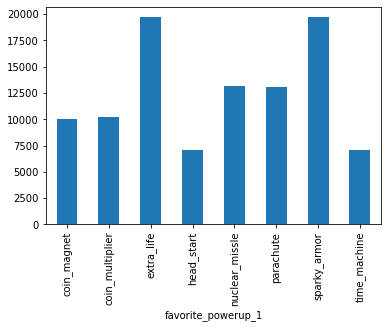

In [5]:
users_df.groupby('favorite_powerup_1').agg('count')['id'].plot(kind='bar')

In [27]:
def get_last_run_end_reason():
    return random.choice(['wall', 'laser'])

def get_is_powerup_clicked(row):
    if row['last_run_end_reason'] == 'laser' and 'sparky_armor' == row['presented_powerup'] and random.uniform(0, 1) < 0.5:
        return True
    if row['favorite_powerup_1'] == row['presented_powerup'] and random.uniform(0, 1) < 0.8:
        return True
    if row['favorite_powerup_2'] == row['presented_powerup'] and random.uniform(0, 1) < 0.6:
        return True
    return False

def generate_data(n):
    game_df = users_df.sample(n=1)
    game_df['last_run_end_reason'] = game_df.apply(lambda _ : get_last_run_end_reason(), axis = 1)
    game_df['presented_powerup'] = game_df.apply(lambda _ : get_random_powerup(), axis = 1)
    game_df['is_powerup_clicked'] = game_df.apply(get_is_powerup_clicked, axis=1)

    for i in range(n//10000):
        tmp = users_df.sample(n=10000)
        tmp['last_run_end_reason'] = tmp.apply(lambda _ : get_last_run_end_reason(), axis = 1)
        tmp['presented_powerup'] = tmp.apply(lambda _ : get_random_powerup(), axis = 1)
        tmp['is_powerup_clicked'] = tmp.apply(get_is_powerup_clicked, axis=1)
        game_df = game_df.append(tmp)
        
    game_df = game_df.drop(['id', 'favorite_powerup_1', 'favorite_powerup_2'], axis=1)
    return game_df



In [28]:
training = generate_data(7000000)
validation = generate_data(2000000)
test = generate_data(1000000)

In [29]:
training.to_csv('training.csv', index=False)
validation.to_csv('validation.csv', index=False)
test.to_csv('test.csv', index=False)

In [30]:
training

,distance_avg,coins_spent,game_day,geo_country,device_os,last_run_end_reason,presented_powerup,is_powerup_clicked
97286,114,1162,173,China,Android,laser,parachute,False
86424,109,1916,125,India,Android,wall,time_machine,False
20969,83,0,133,Russia,Android,laser,head_start,False
70085,117,1072,69,Canada,Android,wall,time_machine,False
58437,48,1692,85,France,iOS,laser,extra_life,True
...,...,...,...,...,...,...,...,...
81246,140,283,31,US,iOS,wall,nuclear_missle,True
11369,47,636,53,China,Android,laser,time_machine,False
24607,115,1433,0,South Korea,Android,wall,parachute,False
89578,72,1169,66,China,iOS,wall,coin_magnet,False


In [31]:
from google.cloud import storage


def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print(
        "File {} uploaded to {}.".format(
            source_file_name, destination_blob_name
        )
    )

upload_blob("iap-optimization-codelab", "./training.csv", "training-data/training.csv")
upload_blob("iap-optimization-codelab", "./validation.csv", "validation-data/validation.csv")
upload_blob("iap-optimization-codelab", "./test.csv", "test-data/test.csv")

File ./training.csv uploaded to training-data/training.csv.
File ./validation.csv uploaded to validation-data/validation.csv.
File ./test.csv uploaded to test-data/test.csv.
